In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Load data
stations = pd.read_csv('../data/stations.csv')
station_day = pd.read_csv('../data/station_day.csv')
city_day = pd.read_csv('../data/city_day.csv')

# Step 2: Map City into station_day
station_city_mapping = dict(zip(stations['StationId'], stations['City']))
station_day['City'] = station_day['StationId'].map(station_city_mapping)
station_day = station_day.drop(columns=['StationId'])

# Step 3: Merge city_day and station_day
combined_data = pd.concat([city_day, station_day], axis=0)

# Step 4: Fill missing values using mean imputation (numerical columns only)
numerical_cols = combined_data.select_dtypes(include=['float64', 'int64']).columns
combined_data[numerical_cols] = combined_data[numerical_cols].fillna(combined_data[numerical_cols].mean())

# Step 5: Display number of rows per city
city_counts = combined_data['City'].value_counts()
print("\nNumber of rows per city:\n", city_counts)

# Step 6: Keep only Top 10 cities
top_10_cities = city_counts.head(10).index.tolist()
final_data = combined_data[combined_data['City'].isin(top_10_cities)].copy()  # <-- Important: .copy() to avoid warnings

# Step 7: Label Encode City names
le = LabelEncoder()
final_data['City'] = le.fit_transform(final_data['City'])

# Step 8: Extract Month
final_data['Date'] = pd.to_datetime(final_data['Date'], errors='coerce')  # Handle invalid dates safely
final_data['Month'] = final_data['Date'].dt.month

# Step 9: Create Season column (0=Summer, 1=Monsoon, 2=Winter)
def get_season_number(month):
    if pd.isnull(month):
        return -1  # Unknown
    if month in [3, 4, 5, 6]:
        return 0  # Summer
    elif month in [7, 8, 9, 10]:
        return 1  # Monsoon
    else:
        return 2  # Winter

final_data['Season'] = final_data['Month'].apply(get_season_number)

# After Step 9 (you already created 'Month' and 'Season')

# Step 9.5: Drop 'Date' column (not needed anymore)
final_data = final_data.drop(columns=['Date', 'AQI_Bucket'])


# Step 10: Save final cleaned dataset
final_data.to_csv('dataset_final.csv', index=False)
print("\n✅ Final cleaned and processed dataset saved as 'dataset_final.csv'!")



Number of rows per city:
 City
Delhi                 47369
Bengaluru             14005
Hyderabad             10758
Chennai                8415
Lucknow                8108
Mumbai                 7513
Patna                  4536
Gurugram               4510
Jaipur                 4203
Ahmedabad              4018
Kolkata                3979
Visakhapatnam          2924
Amritsar               2442
Thiruvananthapuram     2364
Jorapokhar             2338
Amaravati              1902
Brajrajnagar           1876
Talcher                1850
Guwahati               1004
Coimbatore              772
Shillong                620
Chandigarh              608
Bhopal                  578
Kochi                   324
Ernakulam               324
Aizawl                  226
Name: count, dtype: int64

✅ Final cleaned and processed dataset saved as 'dataset_final.csv'!


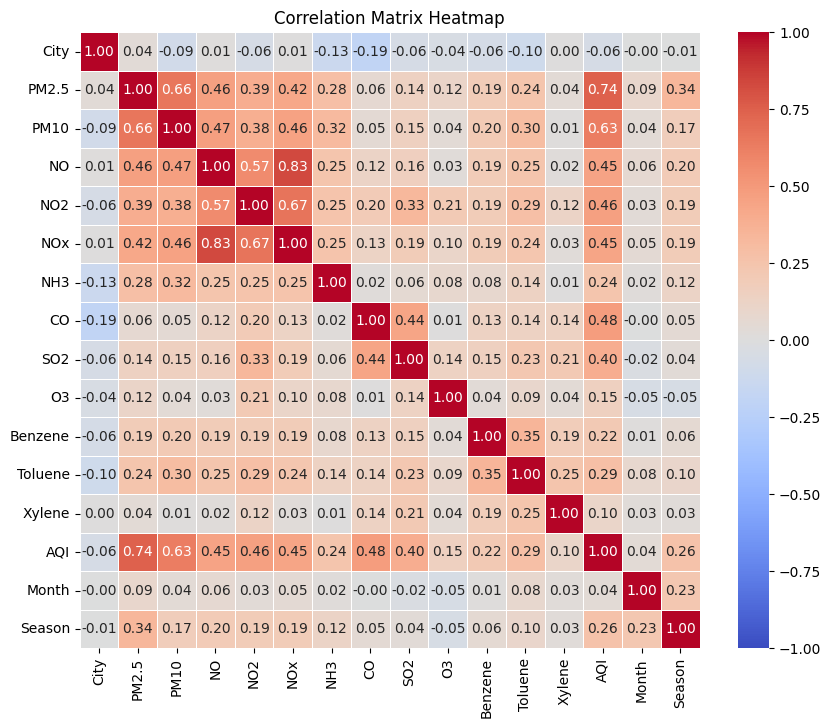

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute the correlation matrix
correlation_matrix = final_data.corr()

# Step 2: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


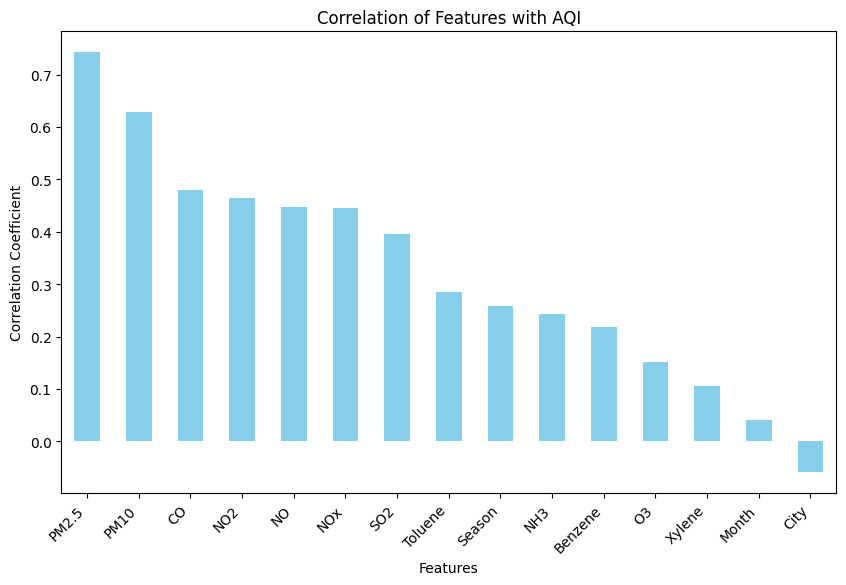

In [14]:
# Step 1: Extract correlation with AQI
correlation_with_aqi = correlation_matrix['AQI'].sort_values(ascending=False)

# Step 2: Plot the bar graph
plt.figure(figsize=(10, 6))
correlation_with_aqi.drop('AQI').plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with AQI')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.show()


In [17]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the actual file name)
df = pd.read_csv('dataset_final.csv')

# Columns to drop
columns_to_drop = ['City','Month','Xylene', 'Benzene', 'NOx', 'Toluene']

# Drop the specified columns
df_cleaned = df.drop(columns=columns_to_drop)

# Save the new dataset to a CSV file
df_cleaned.to_csv('training_dataset.csv', index=False)

print("Columns dropped and new CSV file 'training_dataset.csv' created successfully.")

Columns dropped and new CSV file 'training_dataset.csv' created successfully.
